In [1]:
from fastai.imports import *


In [2]:
from scipy.stats import f_oneway
import pingouin as pg

In [3]:
df = pd.read_excel('All2021Cohorts_merged_outlier managed_copy_2.xlsx', sheet_name='MergedRTV_Control2021',header=5)

In [4]:
cluster_project_officer = {
    "Isunga": {"Project Officer": "Ambrose Nabaasa", "Gender": "M"},
    "Nyungu": {"Project Officer": "Kayona Davis", "Gender": "M"},
    "Kyakahigwa": {"Project Officer": "Mfitumukiza Jackson", "Gender": "M"},
    "Rutendere": {"Project Officer": "Edwine Tuhamye", "Gender": "M"},
    "Buhura": {"Project Officer": "Kayona Davis", "Gender": "M"},
    "Kabatoro": {"Project Officer": "Serevano Birungi", "Gender": "M"},
    "Ibarya": {"Project Officer": "Daniel Mukiza", "Gender": "M"},
    "Muzizi": {"Project Officer": "Moris Mumbere", "Gender": "M"},
    "Kigwabya": {"Project Officer": "Amram Walter Dambya", "Gender": "M"},
    "Kahompo": {"Project Officer": "Cathelene Kansiime", "Gender": "F"},
    "Galiraya": {"Project Officer": "Nelson Nuwagaba", "Gender": "M"},
    "Kihanda": {"Project Officer": "Daniel Mukiza", "Gender": "M"},
    "Kahoko": {"Project Officer": "TINKASIIMIRE PATRICK", "Gender": "M"},
    "Kyakasana": {"Project Officer": "Mfitumukiza Jackson", "Gender": "M"},
    "Kafunda": {"Project Officer": "Kayona Davis", "Gender": "M"},
    "Kitugunda": {"Project Officer": "RHONA OSIIME", "Gender": "F"},
    "Enjeru": {"Project Officer": "Serevano Birungi", "Gender": "M"},
    "Bujengwe": {"Project Officer": "Innocent Machari", "Gender": "M"},
    "Rwanja East": {"Project Officer": "Simon Musiime", "Gender": "M"},
    "Nyamukara": {"Project Officer": "Abubakal Maniragaba", "Gender": "M"},
    "Kacence": {"Project Officer": "RHONA OSIIME", "Gender": "F"},
    "Rugonjo": {"Project Officer": "Morris Mumbere", "Gender": "M"},
    "Murama": {"Project Officer": "AINEBYONA BRIAN", "Gender": "M"},
    "Rubango": {"Project Officer": "Maria Gorrette Kabacaki", "Gender": "F"},
    "Siyoni": {"Project Officer": "Nelson Nuwagaba", "Gender": "M"},
    "Nyamizo": {"Project Officer": "Ambrose Nabaasa", "Gender": "M"},
    "Mpefuu": {"Project Officer": "Abubakal Maniragaba", "Gender": "M"},
    "Ngoma": {"Project Officer": "KATUSIIME CLARE", "Gender": "F"},
    "Kayanja": {"Project Officer": "Resty Nyakato", "Gender": "F"},
    "Kiyanga": {"Project Officer": "Gilbert Kwarisiima", "Gender": "M"},
    "Misenyi": {"Project Officer": "Morris Mumbere", "Gender": "M"},
    "Mugyenza": {"Project Officer": "Pascal Kasaija", "Gender": "M"},
    "Nyamigisa": {"Project Officer": "Johnson Marahi", "Gender": "M"},
    "Rukukuru": {"Project Officer": "Esau Mfitumukiza", "Gender": "M"},
    "Kagati": {"Project Officer": "Simon Musiime", "Gender": "M"},
    "Kurukuru": {"Project Officer": "Elias Tukamushaba", "Gender": "M"},
    "Kihumuro": {"Project Officer": "Francis Gamurorwa", "Gender": "M"},
    "Rwoburunga": {"Project Officer": "Joel Ahumuza", "Gender": "M"},
    "Kaswa": {"Project Officer": "Simon Asiimwe", "Gender": "M"},
    "Kamambu": {"Project Officer": "Fred Muhumuza", "Gender": "M"},
    "Hamurama": {"Project Officer": "Patrick Tumusiime", "Gender": "M"},
    "Mbaba": {"Project Officer": "Johnson Marahi", "Gender": "M"},
    "Mbaba": {"Project Officer": "Johnson Marahi", "Gender": "M"},
    "Burora": {"Project Officer": "Patrick Tumusiime", "Gender": "M"},
    "Nyamukaikuru": {"Project Officer": "Fred Muhumuza", "Gender": "M"},
    "Rwenjaza": {"Project Officer": "Ambrose Nabaasa", "Gender": "M"},
    "Rujumbura": {"Project Officer": "Pascal Kasaija", "Gender": "M"},
    "Nsanja": {"Project Officer": "Patrick Tumusiime", "Gender": "M"},
    "Kandama": {"Project Officer": "Muhawenimana Priscilla", "Gender": "F"},
    "Kanyegaramire": {"Project Officer": "Mfitumukiza Jackson", "Gender": "M"},
    "Igabiro": {"Project Officer": "Resty Nyakato", "Gender": "F"},
    "Byerwa": {"Project Officer": "Jackson Mfitumukiza", "Gender": "M"},
    "Kyema": {"Project Officer": "Elias Tukamushaba", "Gender": "M"},
    "Kamuganga": {"Project Officer": "Cathelene Kansiime", "Gender": "F"},
    "Kijengi": {"Project Officer": "Esau Mfitumukiza", "Gender": "M"},
    "Kadugu": {"Project Officer": "MarryGorrette Kabacaki", "Gender": "F"},
    "Kisansa": {"Project Officer": "Muhawenimana Priscilla", "Gender": "F"},
    "Kamazima": {"Project Officer": "Patrick Tumusiime", "Gender": "M"},
    "Rwemanzi": {"Project Officer": "Esau Mfitumukiza", "Gender": "M"},
    "Nyamweru": {"Project Officer": "Tadeo Tumukunde", "Gender": "M"},
    "Bigando": {"Project Officer": "Simon Asiimwe", "Gender": "M"},
    "Kitahurira": {"Project Officer": "Tadeo Tumukunde", "Gender": "M"},
    "Mugyera": {"Project Officer": "Viola Dufite", "Gender": "F"}
}

In [5]:
cluster_project_officer

{'Isunga': {'Project Officer': 'Ambrose Nabaasa', 'Gender': 'M'},
 'Nyungu': {'Project Officer': 'Kayona Davis', 'Gender': 'M'},
 'Kyakahigwa': {'Project Officer': 'Mfitumukiza Jackson', 'Gender': 'M'},
 'Rutendere': {'Project Officer': 'Edwine Tuhamye', 'Gender': 'M'},
 'Buhura': {'Project Officer': 'Kayona Davis', 'Gender': 'M'},
 'Kabatoro': {'Project Officer': 'Serevano Birungi', 'Gender': 'M'},
 'Ibarya': {'Project Officer': 'Daniel Mukiza', 'Gender': 'M'},
 'Muzizi': {'Project Officer': 'Moris Mumbere', 'Gender': 'M'},
 'Kigwabya': {'Project Officer': 'Amram Walter Dambya', 'Gender': 'M'},
 'Kahompo': {'Project Officer': 'Cathelene Kansiime', 'Gender': 'F'},
 'Galiraya': {'Project Officer': 'Nelson Nuwagaba', 'Gender': 'M'},
 'Kihanda': {'Project Officer': 'Daniel Mukiza', 'Gender': 'M'},
 'Kahoko': {'Project Officer': 'TINKASIIMIRE PATRICK', 'Gender': 'M'},
 'Kyakasana': {'Project Officer': 'Mfitumukiza Jackson', 'Gender': 'M'},
 'Kafunda': {'Project Officer': 'Kayona Davis', 'G

In [12]:
rtv['Gender_details'] = rtv['pre_cluster'].apply(lambda x: cluster_project_officer[x]['Gender'] if x in cluster_project_officer else 'Unknown')

/var/folders/xd/0btgr76j2zxc4__ynw0yhwbm0000gn/T/ipykernel_61886/332861187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rtv['Gender_details'] = rtv['pre_cluster'].apply(lambda x: cluster_project_officer[x]['Gender'] if x in cluster_project_officer else 'Unknown')


In [9]:
rtv['Gender_details'].value_counts()

Gender_details
M    2812
F    1085
Name: count, dtype: int64

In [4]:
df['hhh_sex'].value_counts()

hhh_sex
1    4137
2    1659
Name: count, dtype: int64

In [5]:
sex_mapping = {1: 'Male', 2: 'Female'}

In [6]:
df['Gender'] = df['hhh_sex'].replace(sex_mapping)
df['Gender'].value_counts()

Gender
Male      4137
Female    1659
Name: count, dtype: int64

In [7]:
df['Household_Head_Gender'] = df['Gender']

In [8]:
df['Household_Head_Gender'] = df.apply(lambda row: 'Youth Headed' if row['hhh_age'] < 30 else str(row['Household_Head_Gender']) + ' Headed', axis=1)

In [9]:
df['Household_Head_Gender'].value_counts()

Household_Head_Gender
Male Headed      3715
Female Headed    1603
Youth Headed      478
Name: count, dtype: int64

In [10]:
df['vsla_participation']=(df['hh_members_rtv_vslas'] > 0) | (df['hh_members_non_vslas'] > 0)

In [160]:
df['both_vs_non'] = (df['save_mode_7']==1) & (df['save_mode_8']==1)

In [195]:
df['both_participate'] = (df['save_mode_7']==1) | (df['save_mode_8']==1)

In [11]:
peer = df[df['Status']=='PEER']
rtv = df[df['Status']=='RTV']

In [197]:
df['Status'].value_counts()

Status
RTV     3897
PEER    1899
Name: count, dtype: int64

In [198]:
df['new_status'] = np.where(df['Status'] == 'PEER', 'PEER', 
                            np.where(df['Status'] == 'RTV', 
                                    np.where(df['save_mode_7'] == 1, 
                                    'RTV_vsla', 'RTV_nonvsla'), 
                                    df['Status']))

In [199]:
len(df[df['Status'] == 'PEER'])

1899

In [200]:
rtv['save_mode_7'].value_counts()

save_mode_7
0    2316
1    1581
Name: count, dtype: int64

In [201]:
len(df)

5796

In [202]:
2316+1899+1581

5796

In [203]:
df['new_status'].value_counts()

new_status
RTV_nonvsla    2316
PEER           1899
RTV_vsla       1581
Name: count, dtype: int64

In [204]:
rtv_vsf = rtv[rtv["save_mode_7"] == 1]
rtv_nvsf =  rtv[rtv["save_mode_7"]==0]

In [205]:
adjusted_cpi = 80.66
rate = 3600

In [206]:
peer.shape, rtv_vsf.shape, rtv_nvsf.shape

((1899, 5669), (1581, 5669), (2316, 5669))

## Savings / Loans

In [207]:
rtv['save_mode_7'].value_counts(normalize=True)

save_mode_7
0    0.594303
1    0.405697
Name: proportion, dtype: float64

In [208]:
len(rtv[rtv['Total Savings (Ugx)'] != 0]) / len(rtv)

0.8452655889145496

In [241]:
rtv.groupby('Household_Head_Gender')['save_mode_7'].value_counts(normalize=True)

Household_Head_Gender  save_mode_7
Female Headed          0              0.623389
                       1              0.376611
Male Headed            0              0.564317
                       1              0.435683
Youth Headed           0              0.740000
                       1              0.260000
Name: proportion, dtype: float64

In [246]:
rtv.groupby('Household_Head_Gender').apply(lambda x: len(x[x['Total Savings (Ugx)'] != 0]) / len(x))

Household_Head_Gender
Female Headed    0.793738
Male Headed      0.867384
Youth Headed     0.846667
dtype: float64

In [ ]:
# (rtv['saving_amount_rtv_vsla_cashround'].apply(lambda x: 0 if pd.isna(x) or x == 0 else 1)).value_counts(normalize=True)

In [ ]:
# (rtv_both['saving_amount_rtv_vsla_cashround'].apply(lambda x: 0 if pd.isna(x) or x == 0 else 1)).value_counts(normalize=True)

In [ ]:
# (rtv_both['saving_amount_non_rtv_vsla'].apply(lambda x: 0 if pd.isna(x) or x == 0 else 1)).value_counts(normalize=True)

In [223]:
(rtv['saving_amount_rtv_vsla_cashround'] == 0).value_counts()

saving_amount_rtv_vsla_cashround
False    3882
True       15
Name: count, dtype: int64

In [221]:
rtv['saving_amount_rtv_vsla_cashround'].isna().value_counts(normalize=True)

saving_amount_rtv_vsla_cashround
True     0.597639
False    0.402361
Name: proportion, dtype: float64

In [209]:
peer['save_mode_7'].value_counts(normalize=True)

save_mode_7
0    0.993154
1    0.006846
Name: proportion, dtype: float64

In [210]:
len(peer[peer['Total Savings (Ugx)'] != 0]) / len(peer)

0.7109004739336493

In [211]:
rtv['both_vs_non'].value_counts(normalize=True)

both_vs_non
False    0.840903
True     0.159097
Name: proportion, dtype: float64

In [243]:
rtv['both_participate'].value_counts(normalize=True)

both_participate
True     0.603798
False    0.396202
Name: proportion, dtype: float64

In [244]:
rtv.groupby('Household_Head_Gender')['both_participate'].value_counts(normalize=True)

Household_Head_Gender  both_participate
Female Headed          True                0.556169
                       False               0.443831
Male Headed            True                0.628037
                       False               0.371963
Youth Headed           True                0.573333
                       False               0.426667
Name: proportion, dtype: float64

In [247]:
rtv_both.groupby('Household_Head_Gender').apply(lambda x: len(x[x['Total Savings (Ugx)'] != 0]) / len(x))

Household_Head_Gender
Female Headed    0.983444
Male Headed      0.987318
Youth Headed     0.994186
dtype: float64

In [213]:
rtv_both = rtv[rtv['both_participate'] == True]

In [214]:
len(rtv_both[rtv_both['Total Savings (Ugx)'] != 0]) / len(rtv_both)

0.9868253293667658

In [187]:
# group_sizes = rtv.groupby('both_vs_non').size()
# group_sizes

# non_zero_counts = rtv[rtv['Total Savings (Ugx)'] != 0].groupby('both_vs_non').size()
# proportions = non_zero_counts / group_sizes

# non_zero_counts

# proportions

In [189]:
peer['save_mode_8'].value_counts(normalize=True)

save_mode_8
0    0.679305
1    0.320695
Name: proportion, dtype: float64

In [190]:
len(peer[peer['Total Savings (Ugx)'] != 0]) / len(peer)

0.7109004739336493

In [245]:
peer.groupby('Household_Head_Gender')['save_mode_8'].value_counts(normalize=True)

Household_Head_Gender  save_mode_8
Female Headed          0              0.723404
                       1              0.276596
Male Headed            0              0.660299
                       1              0.339701
Youth Headed           0              0.679775
                       1              0.320225
Name: proportion, dtype: float64

In [248]:
peer.groupby('Household_Head_Gender').apply(lambda x: len(x[x['Total Savings (Ugx)'] != 0]) / len(x))

Household_Head_Gender
Female Headed    0.665377
Male Headed      0.725914
Youth Headed     0.741573
dtype: float64

In [66]:
# Total Savings
(df.groupby('new_status')['Total Savings (Ugx)'].mean() * (adjusted_cpi/100))/rate

new_status
PEER           37.848871
RTV_nonvsla    53.633870
RTV_vsla       76.985118
Name: Total Savings (Ugx), dtype: float64

In [22]:
rtv_vsf['Total Savings (Ugx)'].mean() * (adjusted_cpi/100)/rate

76.98511758872725

In [23]:
rtv_vsf[rtv_vsf['Total Savings (Ugx)'] != 0]['Total Savings (Ugx)'].mean() * (adjusted_cpi/100)/rate

77.77218588356408

In [24]:
f_oneway(peer['Total Savings (Ugx)'], rtv_vsf['Total Savings (Ugx)'],rtv_nvsf['Total Savings (Ugx)'])

F_onewayResult(statistic=12.151529236440386, pvalue=5.416227724181246e-06)

In [25]:
pg.anova(data=df, dv='Total Savings (Ugx)', between='new_status', detailed=False)

,Source,ddof1,ddof2,F,p-unc,np2
0,new_status,2,5793,12.151529,0.000005,0.004178


/Users/rtv-lpt-127/mambaforge/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rtv-lpt-127/mambaforge/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rtv-lpt-127/mambaforge/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


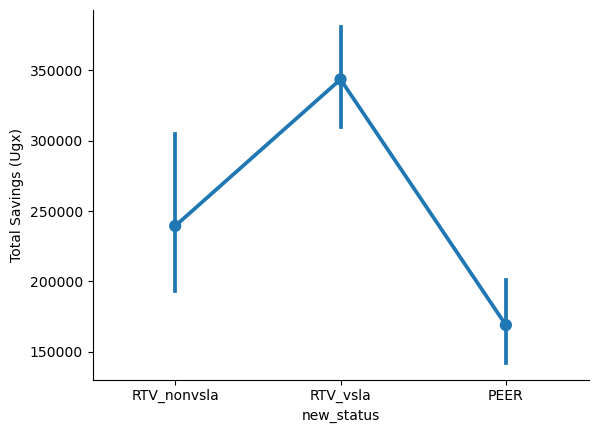

In [26]:
import seaborn as sns

fig = sns.pointplot(x='new_status', y = 'Total Savings (Ugx)', data = df)
sns.despine()

/Users/rtv-lpt-127/mambaforge/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rtv-lpt-127/mambaforge/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rtv-lpt-127/mambaforge/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


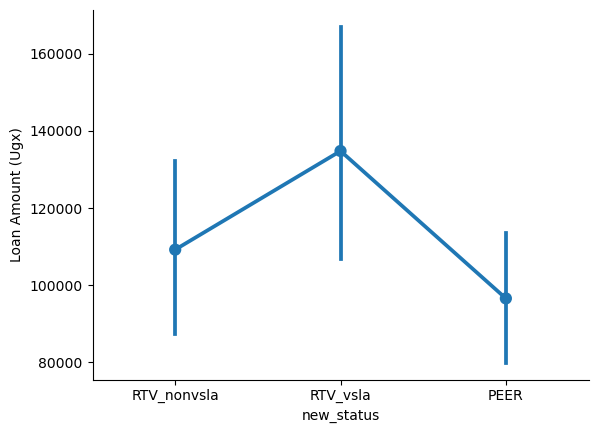

In [27]:
import seaborn as sns

fig = sns.pointplot(x='new_status', y = 'Loan Amount (Ugx)', data = df)
sns.despine()

In [28]:
## Loan Amount
(df.groupby('new_status')['Loan Amount (Ugx)'].mean() * (adjusted_cpi/100))/rate

new_status
PEER           21.640534
RTV_nonvsla    24.473426
RTV_vsla       30.203284
Name: Loan Amount (Ugx), dtype: float64

In [29]:
subset = df[df['borrowed_past_12_months'] == 1]

In [30]:
(subset.groupby('Status')['Loan Amount (Ugx)'].mean() * (adjusted_cpi/100))/rate

Status
PEER    139.780183
RTV     121.010251
Name: Loan Amount (Ugx), dtype: float64

In [31]:
## Loan Amount for only those that saved
(subset.groupby('new_status')['Loan Amount (Ugx)'].mean() * (adjusted_cpi/100))/rate

new_status
PEER           139.780183
RTV_nonvsla    163.816342
RTV_vsla        92.362461
Name: Loan Amount (Ugx), dtype: float64

In [32]:
f_oneway(peer['Loan Amount (Ugx)'], rtv_vsf['Loan Amount (Ugx)'],rtv_nvsf['Loan Amount (Ugx)'])

F_onewayResult(statistic=2.5210681674646076, pvalue=0.08046188744314693)

### Percentage of household active

In [33]:
# helper function
def get_df_name(df):
    name = [x for x in globals() if globals()[x] is df][0]
    return name

In [34]:
for frame in [peer, rtv_vsf, rtv_nvsf]:
    percent = (len(frame[frame['Total Savings (Ugx)'] != 0]) / len(frame))
    print(f"{get_df_name(frame)}:{percent}")

peer:0.7109004739336493
rtv_vsf:0.9898798228969007
rtv_nvsf:0.7465457685664939


In [35]:
for frame in [peer, rtv_vsf, rtv_nvsf]:
    save = frame.loc[frame['Total Savings (Ugx)'] != 0]['Total Savings (Ugx)'].mean() * (adjusted_cpi/100)/rate
    print(f"{get_df_name(frame)}:{save}")

peer:53.240744979423866
rtv_vsf:77.77218588356408
rtv_nvsf:71.84270802965747


In [36]:
# Total savings for households actively saving.
rtv_vsf.loc[rtv_vsf['Total Savings (Ugx)'] != 0]['Total Savings (Ugx)'].mean() * (adjusted_cpi/100)/rate

77.77218588356408

### Total Outstanding debt

In [37]:
columns = ['bank_loan_remaining',
            'sacco_loan_remaining',
            'shop_keeper_loan_remaining',
            'family_friend_loan_remaining',
            'rtv_vsla_loan_remaining',
            'other_village_VSLA_loan_remaining',
            'money_lender_loan_remaining',
            'other_loan_source_loan_remaining']

In [38]:
for frame in [peer, rtv_vsf, rtv_nvsf]:
    debt = frame[columns].fillna(0).sum(axis=1).mean() * (adjusted_cpi/100)/rate
    print(f"{get_df_name(frame)}:\t{debt}")

peer:	18.940612725879117
rtv_vsf:	24.101146636270993
rtv_nvsf:	21.98156234168106


In [39]:
peer_debt = peer[columns].sum(axis=1)
rtv_vsf_debt = rtv_vsf[columns].sum(axis=1)
rtv_nvsf_debt = rtv_nvsf[columns].sum(axis=1)

In [40]:
f_oneway(peer_debt, rtv_vsf_debt, rtv_nvsf_debt)

F_onewayResult(statistic=0.7238231215707888, pvalue=0.4849387442844615)

### Loan in the first 12 months

In [41]:
loan = (df.groupby('new_status')['borrowed_past_12_months'].value_counts(normalize=True)).unstack().transpose()
loan

new_status,PEER,RTV_nonvsla,RTV_vsla
borrowed_past_12_months,,,
0,0.845182,0.850604,0.672992
1,0.154818,0.149396,0.327008


In [146]:
rtv_vsf['borrowed_past_12_months'].value_counts()

borrowed_past_12_months
0    1064
1     517
Name: count, dtype: int64

## Percentage of households in vsla

In [67]:
df['vsla_participation'].value_counts()

vsla_participation
False    4266
True     1530
Name: count, dtype: int64

In [69]:
peer['vsla_participation'].value_counts(normalize=True)

vsla_participation
False    0.993154
True     0.006846
Name: proportion, dtype: float64

In [70]:
rtv_nvsf['vsla_participation'].value_counts(normalize=True)

vsla_participation
False    1.0
Name: proportion, dtype: float64

In [43]:
517/(517+1064)

0.3270082226438963

### Interest Rate

In [44]:
for frame in [peer, rtv_vsf, rtv_nvsf]:
    interest = frame[frame['Interest'] != 0.]['Interest'].mean()
    print(f"{get_df_name(frame)}:\t{interest}")

peer:	5.284861591695501
rtv_vsf:	4.267198443579767
rtv_nvsf:	4.757902654867256


# Income Earnings and Asssets

In [109]:
#Annual Agric Income
(rtv_nvsf[['Perenial Crops Income (USD_Cons_rate)','Seasonal Crops Income (USD_Cons_rate)']].sum(axis=1)).mean()

238.65437850640475

In [110]:
rtv_nvsf[[
    'Perenial Crops Income (USD_Cons_rate)',
    'Perennial Agriculture Value (USD_Cons_rate)',
    'Agriculture Value (USD_Cons_rate)'
]].mean().transpose()

Perenial Crops Income (USD_Cons_rate)          127.486010
Perennial Agriculture Value (USD_Cons_rate)    268.022003
Agriculture Value (USD_Cons_rate)              560.655393
dtype: float64

In [45]:
df.groupby('new_status')[[
    'Personal Business & Self Employment (USD_Cons_rate)',
    'Seasonal Crops Income (USD_Cons_rate)',
    'Seasonal  Agriculture Value (USD_Cons_rate)',
    'Livestock Income (USD_Cons_rate)',
    'Assets (USD_Cons_rate)',
    'HH Income (USD_Cons_rate)',
    'HH Income + Consumption + Residues (USD_Cons_rate)',
    'HH Income/Day (USD_Cons_rate)',
    'HH Income + Consumption + Residues/Day (USD_Cons_rate)'
]].mean().transpose()

new_status,PEER,RTV_nonvsla,RTV_vsla
Personal Business & Self Employment (USD_Cons_rate),37.784569,65.591896,82.865723
Seasonal Crops Income (USD_Cons_rate),46.677270,111.168368,135.076845
Seasonal Agriculture Value (USD_Cons_rate),183.484331,292.633390,343.952211
Livestock Income (USD_Cons_rate),9.978979,20.175593,29.226014
Assets (USD_Cons_rate),101.689130,183.786609,236.608194
HH Income (USD_Cons_rate),281.445324,464.124237,513.651618
HH Income + Consumption + Residues (USD_Cons_rate),486.904836,788.350217,860.715423
HH Income/Day (USD_Cons_rate),0.771083,1.271573,1.407265
HH Income + Consumption + Residues/Day (USD_Cons_rate),1.333986,2.159864,2.358124


## Purpose of the Loan

In [46]:
((df.groupby('new_status')['purpose_for_borrow'].value_counts(normalize=True)*100).unstack()).transpose()

new_status,PEER,RTV_nonvsla,RTV_vsla
purpose_for_borrow,,,
1.0,34.353741,31.502890,28.820116
2.0,8.503401,6.069364,3.675048
3.0,11.904762,15.895954,9.477756
4.0,17.687075,16.473988,21.663443
5.0,7.142857,7.514451,2.901354
6.0,2.040816,7.225434,22.630561
7.0,5.442177,5.202312,3.094778
8.0,6.462585,4.335260,4.835590
9.0,2.380952,3.179191,1.740812


In [47]:
rtv_vsf['purpose_for_borrow'].value_counts()

purpose_for_borrow
1.0     149
6.0     117
4.0     112
3.0      49
8.0      25
2.0      19
7.0      16
5.0      15
9.0       9
97.0      6
Name: count, dtype: int64

In [141]:
df['other_village_VSLA_loan_term'].mean()

6.279411764705882

In [142]:
df['rtv_vsla_loan_term'].mean()

8.205882352941176

In [143]:
df['bank_loan_term'].mean()

11.24390243902439

In [144]:
df['sacco_loan_term'].mean()

10.936170212765957

## Loan Sources

In [48]:
#Bank Account
(df.groupby('new_status')['Loan_from_1'].value_counts(normalize=True)).unstack().transpose()

new_status,PEER,RTV_nonvsla,RTV_vsla
Loan_from_1,,,
0.0,0.884354,0.921965,0.959381
1.0,0.115646,0.078035,0.040619


In [145]:
#saving and Credit accounts
(df.groupby('new_status')['Loan_from_2'].value_counts(normalize=True)).unstack().transpose()

new_status,PEER,RTV_nonvsla,RTV_vsla
Loan_from_2,,,
0.0,0.734694,0.797688,0.922631
1.0,0.265306,0.202312,0.077369


In [50]:
# RTV VSLA
(df.groupby('new_status')['Loan_from_7'].value_counts(normalize=True)).unstack().transpose()

new_status,PEER,RTV_nonvsla,RTV_vsla
Loan_from_7,,,
0.0,1.0,0.699422,0.280464
1.0,NaN,0.300578,0.719536


In [51]:
# RTV VSLA
(df.groupby('new_status')['Loan_from_3'].value_counts(normalize=True)).unstack().transpose()

new_status,PEER,RTV_nonvsla,RTV_vsla
Loan_from_3,,,
0.0,1.0,1.0,1.0


In [52]:
# RTV VSLA
(df.groupby('new_status')['Loan_from_8'].value_counts(normalize=True)).unstack().transpose()

new_status,PEER,RTV_nonvsla,RTV_vsla
Loan_from_8,,,
0.0,0.496599,0.638728,0.870406
1.0,0.503401,0.361272,0.129594


In [53]:
# RTV VSLA
(df.groupby('new_status')['Loan_from_6'].value_counts(normalize=True)).unstack().transpose()

new_status,PEER,RTV_nonvsla,RTV_vsla
Loan_from_6,,,
0.0,1.0,0.988439,0.998066
1.0,NaN,0.011561,0.001934


In [54]:
# RTV VSLA
(df.groupby('new_status')['Loan_from_97'].value_counts(normalize=True)).unstack().transpose()

new_status,PEER,RTV_nonvsla,RTV_vsla
Loan_from_97,,,
0.0,0.965986,0.968208,0.984526
1.0,0.034014,0.031792,0.015474


In [55]:
# RTV VSLA
(df.groupby('new_status')['Loan_from_99'].value_counts(normalize=True)*100).unstack().transpose()

new_status,PEER,RTV_nonvsla,RTV_vsla
Loan_from_99,,,
0.0,98.979592,99.710983,99.806576
1.0,1.020408,0.289017,0.193424


In [56]:
# RTV VSLA
(df.groupby('new_status')['Loan_from_4'].value_counts(normalize=True)*100).unstack().transpose()

new_status,PEER,RTV_nonvsla,RTV_vsla
Loan_from_4,,,
0.0,100.0,99.421965,100.0
1.0,NaN,0.578035,NaN


In [57]:
df_c = df.copy()

In [58]:
df_c.loc[(df_c['new_status'] == 'RTV_nonvsla') & (df_c['Loan_from_7'] == 1), 'Loan_from_7'] = 0

In [59]:
(df_c.groupby('new_status')['Loan_from_7'].value_counts(normalize=True)*100).unstack().transpose()

new_status,PEER,RTV_nonvsla,RTV_vsla
Loan_from_7,,,
0.0,100.0,100.0,28.046422
1.0,NaN,NaN,71.953578


In [60]:
# Other VSLA
(df.groupby('new_status')['Loan_from_8'].value_counts(normalize=True)*100).unstack().transpose()

new_status,PEER,RTV_nonvsla,RTV_vsla
Loan_from_8,,,
0.0,49.659864,63.872832,87.040619
1.0,50.340136,36.127168,12.959381


## Interests Rates

In [61]:
(df.groupby('new_status')[[
        'bank_loan_interest',
        'sacco_loan_interest',
        'rtv_vsla_loan_interest',
        'other_village_VSLA_loan_interest'
        ]].mean()).transpose()

new_status,PEER,RTV_nonvsla,RTV_vsla
bank_loan_interest,4.133824,5.496667,3.857143
sacco_loan_interest,5.445513,4.127143,3.967500
rtv_vsla_loan_interest,NaN,3.143452,3.765161
other_village_VSLA_loan_interest,5.185980,5.541600,5.902985


## Loan Types

In [62]:
(df.groupby('new_status')['bank_loan_type'].value_counts(normalize=True)).unstack().transpose()

new_status,PEER,RTV_nonvsla,RTV_vsla
bank_loan_type,,,
1.0,0.470588,0.481481,0.52381
2.0,0.500000,0.518519,0.47619
97.0,0.029412,NaN,NaN


In [63]:
peer['save_mode_8'].value_counts()

save_mode_8
0    1290
1     609
Name: count, dtype: int64

In [71]:
peer_mapping = {1: 'peer_vsla', 0: 'peer_non_vsla'}

In [72]:
peer['peer_status'] = peer['save_mode_8'].replace(peer_mapping)
peer['peer_status'].value_counts()

/var/folders/xd/0btgr76j2zxc4__ynw0yhwbm0000gn/T/ipykernel_63383/2531600782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peer['peer_status'] = peer['save_mode_8'].replace(peer_mapping)


peer_status
peer_non_vsla    1290
peer_vsla         609
Name: count, dtype: int64

In [73]:
peer_vsla = peer[peer["save_mode_8"] == 1]
peer_non_vsla =  peer[peer["save_mode_8"]==0]

In [74]:
peer_vsla.shape, peer_non_vsla.shape

((609, 5668), (1290, 5668))

In [75]:
# Total Savings
(peer.groupby('peer_status')['Total Savings (Ugx)'].mean() * (adjusted_cpi/100))/rate

peer_status
peer_non_vsla    28.589576
peer_vsla        57.462156
Name: Total Savings (Ugx), dtype: float64

In [82]:
peer['vsla_participation'].value_counts()

vsla_participation
False    1886
True       13
Name: count, dtype: int64

In [87]:
peer_vsla[['save_mode','hh_members_rtv_vslas','hh_members_non_vslas', 'vsla_participation']]

,save_mode,hh_members_rtv_vslas,hh_members_non_vslas,vsla_participation
3898,3 8,NaN,NaN,False
3900,1 5 8 9,NaN,NaN,False
3901,8,NaN,NaN,False
3907,8,NaN,NaN,False
3909,8,NaN,NaN,False
...,...,...,...,...
5780,8,NaN,NaN,False
5786,8,NaN,NaN,False
5787,8,NaN,NaN,False
5790,1 6 8,NaN,NaN,False


In [79]:
peer_vsla['vsla_participation'].value_counts()

vsla_participation
False    608
True       1
Name: count, dtype: int64

In [80]:
peer_non_vsla['vsla_participation'].value_counts()

vsla_participation
False    1278
True       12
Name: count, dtype: int64

In [99]:
peer_vsla['save_mode_8'].value_counts()

save_mode_8
1    609
Name: count, dtype: int64

In [93]:
(peer_non_vsla['save_mode_7'] ==1 ) | (peer_non_vsla['save_mode_8'] == 1)

/var/folders/xd/0btgr76j2zxc4__ynw0yhwbm0000gn/T/ipykernel_63383/2763767585.py:1: FutureWarning: Operation between non boolean Series with different indexes will no longer return a boolean result in a future version. Cast both Series to object type to maintain the prior behavior.
  (peer_non_vsla['save_mode_7'] ==1 ) | (peer_non_vsla['save_mode_8'] == 1).value_counts()


False    False
3897     False
3899     False
3902     False
3903     False
         ...  
5789     False
5792     False
5793     False
5794     False
5795     False
Length: 1291, dtype: bool

In [ ]:
peer_vsla['save_mode

In [76]:
## Loan Amount
(peer.groupby('peer_status')['Loan Amount (Ugx)'].mean() * (adjusted_cpi/100))/rate

peer_status
peer_non_vsla    21.272425
peer_vsla        22.420272
Name: Loan Amount (Ugx), dtype: float64

### Total Outstanding debt

In [77]:
peer_vsla[columns].fillna(0).sum(axis=1).mean() * (adjusted_cpi/100)/rate

15.727191580003648

In [78]:
peer_non_vsla[columns].fillna(0).sum(axis=1).mean() * (adjusted_cpi/100)/rate

20.457646429629627

In [72]:
(len(peer_vsla[peer_vsla['Total Savings (Ugx)'] != 0]) / len(peer_vsla))

0.9802955665024631

In [73]:
(len(peer_non_vsla[peer_non_vsla['Total Savings (Ugx)'] != 0]) / len(peer_non_vsla))

0.5837209302325581

In [74]:
(peer.groupby('peer_status')['borrowed_past_12_months'].value_counts(normalize=True)).unstack().transpose()

peer_status,peer_non_vsla,peer_vsla
borrowed_past_12_months,,
0,0.869767,0.793103
1,0.130233,0.206897


In [75]:
peer_vsla[peer_vsla['Interest'] != 0.]['Interest'].mean()

5.40813492063492

In [76]:
peer_non_vsla[peer_non_vsla['Interest'] != 0.]['Interest'].mean()

5.189570552147239

In [111]:
#Annual Agric Income
(peer[['Perenial Crops Income (USD_Cons_rate)','Seasonal Crops Income (USD_Cons_rate)']].sum(axis=1)).mean()

92.35723027938681

In [105]:
peer[[
    'Perenial Crops Income (USD_Cons_rate)',
    'Perennial Agriculture Value (USD_Cons_rate)',
    'Agriculture Value (USD_Cons_rate)'
]].mean().transpose()

Perenial Crops Income (USD_Cons_rate)           45.679961
Perennial Agriculture Value (USD_Cons_rate)    113.119220
Agriculture Value (USD_Cons_rate)              296.603551
dtype: float64

In [113]:
#Annual Agric Income
(peer_vsla[['Perenial Crops Income (USD_Cons_rate)','Seasonal Crops Income (USD_Cons_rate)']].sum(axis=1)).mean()

105.33129436690385

In [114]:
#Annual Agric Income
(peer_non_vsla[['Perenial Crops Income (USD_Cons_rate)','Seasonal Crops Income (USD_Cons_rate)']].sum(axis=1)).mean()

86.2322651403962

In [104]:
peer.groupby('peer_status')[[
    'Perenial Crops Income (USD_Cons_rate)',
    'Perennial Agriculture Value (USD_Cons_rate)',
    'Agriculture Value (USD_Cons_rate)'
]].mean().transpose()

peer_status,peer_non_vsla,peer_vsla
Perenial Crops Income (USD_Cons_rate),43.806179,49.649056
Perennial Agriculture Value (USD_Cons_rate),104.982160,130.355357
Agriculture Value (USD_Cons_rate),278.219630,335.544861


In [100]:
peer.groupby('peer_status')[[
    'Personal Business & Self Employment (USD_Cons_rate)',
    'Seasonal Crops Income (USD_Cons_rate)',
    'Seasonal  Agriculture Value (USD_Cons_rate)',
    'Livestock Income (USD_Cons_rate)',
    'Assets (USD_Cons_rate)',
    'HH Income (USD_Cons_rate)',
    'HH Income + Consumption + Residues (USD_Cons_rate)',
    'HH Income/Day (USD_Cons_rate)',
    'HH Income + Consumption + Residues/Day (USD_Cons_rate)'
]].mean().transpose()

peer_status,peer_non_vsla,peer_vsla
Personal Business & Self Employment (USD_Cons_rate),32.476454,49.028359
Seasonal Crops Income (USD_Cons_rate),42.426087,55.682239
Seasonal Agriculture Value (USD_Cons_rate),173.237471,205.189504
Livestock Income (USD_Cons_rate),8.780216,12.518230
Assets (USD_Cons_rate),92.545626,121.057143
HH Income (USD_Cons_rate),261.278281,324.163690
HH Income + Consumption + Residues (USD_Cons_rate),454.432211,555.689214
HH Income/Day (USD_Cons_rate),0.715831,0.888120
HH Income + Consumption + Residues/Day (USD_Cons_rate),1.245020,1.522436


In [78]:
((peer.groupby('peer_status')['purpose_for_borrow'].value_counts(normalize=True)).unstack()).transpose()

peer_status,peer_non_vsla,peer_vsla
purpose_for_borrow,,
1.0,0.345238,0.341270
2.0,0.065476,0.111111
3.0,0.142857,0.087302
4.0,0.166667,0.190476
5.0,0.065476,0.079365
6.0,0.023810,0.015873
7.0,0.059524,0.047619
8.0,0.053571,0.079365
9.0,0.029762,0.015873


In [79]:
#Bank Account
(peer.groupby('peer_status')['Loan_from_1'].value_counts(normalize=True).unstack().transpose())

peer_status,peer_non_vsla,peer_vsla
Loan_from_1,,
0.0,0.85119,0.928571
1.0,0.14881,0.071429


In [80]:
#saving and Credit accounts
(peer.groupby('peer_status')['Loan_from_2'].value_counts(normalize=True)).unstack().transpose()

peer_status,peer_non_vsla,peer_vsla
Loan_from_2,,
0.0,0.60119,0.912698
1.0,0.39881,0.087302


In [81]:
# Other VSLA
(peer.groupby('peer_status')['Loan_from_8'].value_counts(normalize=True)).unstack().transpose()

peer_status,peer_non_vsla,peer_vsla
Loan_from_8,,
0.0,0.72619,0.190476
1.0,0.27381,0.809524


In [82]:
(peer.groupby('peer_status')[[
        'bank_loan_interest',
        'sacco_loan_interest',
        'rtv_vsla_loan_interest',
        'other_village_VSLA_loan_interest'
        ]].mean()).transpose()

peer_status,peer_non_vsla,peer_vsla
bank_loan_interest,3.402000,6.166667
sacco_loan_interest,5.430597,5.536364
rtv_vsla_loan_interest,NaN,NaN
other_village_VSLA_loan_interest,5.141304,5.206127


In [83]:
(peer.groupby('peer_status')['bank_loan_type'].value_counts(normalize=True)).unstack().transpose()

peer_status,peer_non_vsla,peer_vsla
bank_loan_type,,
1.0,0.56,0.222222
2.0,0.40,0.777778
97.0,0.04,NaN


## Gender Aggregation

In [193]:
# Total Savings
((df.groupby(['new_status'])['Total Savings (Ugx)'].mean() * (adjusted_cpi/100))/rate)

new_status
PEER           37.848871
RTV_nonvsla    53.633870
RTV_vsla       76.985118
Name: Total Savings (Ugx), dtype: float64

In [202]:
peer['Household_Head_Gender'].value_counts()

Household_Head_Gender
Male Headed      1204
Female Headed     517
Youth Headed      178
Name: count, dtype: int64

In [203]:
rtv_nvsf['Household_Head_Gender'].value_counts()

Household_Head_Gender
Male Headed      1417
Female Headed     677
Youth Headed      222
Name: count, dtype: int64

In [119]:
# Total Savings
((peer.groupby(['peer_status', 'Household_Head_Gender'])['Total Savings (Ugx)'].mean() * (adjusted_cpi/100))/rate).unstack()

Household_Head_Gender,Female Headed,Male Headed,Youth Headed
peer_status,,,
peer_non_vsla,23.666916,32.538785,17.857783
peer_vsla,31.772018,64.168087,73.794859


In [141]:
# Total Savings
((df.groupby(['new_status', 'Household_Head_Gender'])['Total Savings (Ugx)'].mean() * (adjusted_cpi/100))/rate).unstack()

Household_Head_Gender,Female Headed,Male Headed,Youth Headed
new_status,,,
PEER,25.908753,43.283290,35.770218
RTV_nonvsla,25.637482,65.201891,65.172917
RTV_vsla,63.172546,82.205713,76.190379


In [120]:
((peer.groupby(['peer_status', 'Household_Head_Gender'])['Loan Amount (Ugx)'].mean() * (adjusted_cpi/100))/rate).unstack()

Household_Head_Gender,Female Headed,Male Headed,Youth Headed
peer_status,,,
peer_non_vsla,12.080429,27.664802,7.684550
peer_vsla,15.151169,27.341352,5.345887


In [191]:
((df.groupby(['new_status', 'Household_Head_Gender'])['Loan Amount (Ugx)'].mean() * (adjusted_cpi/100))/rate).unstack()

Household_Head_Gender,Female Headed,Male Headed,Youth Headed
new_status,,,
PEER,12.929782,27.554925,6.935652
RTV_nonvsla,10.090774,32.127543,19.478704
RTV_vsla,16.790471,36.612193,10.645511


In [89]:
filtered_df = df[df['Total Savings (Ugx)'] != 0]
result = ((filtered_df.groupby(['new_status', 'Household_Head_Gender'])['Loan Amount (Ugx)'].mean() * (adjusted_cpi/100))/rate).unstack()
result

Household_Head_Gender,Female Headed,Male Headed,Youth Headed
new_status,,,
PEER,13.319582,30.296464,9.148935
RTV_nonvsla,10.839974,34.755211,24.430917
RTV_vsla,16.956303,33.855974,10.783765


In [121]:
peer.groupby(['peer_status','Household_Head_Gender']).apply(lambda x: len(x[x['Total Savings (Ugx)'] != 0]) / len(x))

peer_status    Household_Head_Gender
peer_non_vsla  Female Headed            0.542781
               Male Headed              0.596226
               Youth Headed             0.628099
peer_vsla      Female Headed            0.986014
               Male Headed              0.977995
               Youth Headed             0.982456
dtype: float64

In [84]:
peer.groupby('Household_Head_Gender').apply(lambda x: len(x[x['Total Savings (Ugx)'] != 0]) / len(x))

Household_Head_Gender
Female Headed    0.665377
Male Headed      0.725914
Youth Headed     0.741573
dtype: float64

In [85]:
rtv_nvsf.groupby('Household_Head_Gender').apply(lambda x: len(x[x['Total Savings (Ugx)'] != 0]) / len(x))

Household_Head_Gender
Female Headed    0.675037
Male Headed      0.772759
Youth Headed     0.797297
dtype: float64

In [86]:
rtv_vsf.groupby('Household_Head_Gender').apply(lambda x: len(x[x['Total Savings (Ugx)'] != 0]) / len(x))

Household_Head_Gender
Female Headed    0.990220
Male Headed      0.989945
Youth Headed     0.987179
dtype: float64

In [142]:
## Loan Amount for only those that saved
((subset.groupby(['new_status', 'Household_Head_Gender'])['Loan Amount (Ugx)'].mean() * (adjusted_cpi/100))/rate).unstack()

Household_Head_Gender,Female Headed,Male Headed,Youth Headed
new_status,,,
PEER,115.253405,157.232844,49.381844
RTV_nonvsla,78.522458,200.549463,135.133507
RTV_vsla,55.381474,107.671343,39.540471


In [123]:
for frame in [peer_vsla]:
    for gender in frame['Household_Head_Gender'].unique():
        sub_frame = frame[frame['Household_Head_Gender'] == gender]
        debt = sub_frame[columns].fillna(0).sum(axis=1).mean() * (adjusted_cpi / 100) / rate
        print(f"{get_df_name(frame)} ({gender}):\t{debt}")

frame (Female Headed):	9.624987956487956
frame (Male Headed):	19.268887340396635
frame (Youth Headed):	5.62300828460039


In [124]:
for frame in [peer_non_vsla]:
    for gender in frame['Household_Head_Gender'].unique():
        sub_frame = frame[frame['Household_Head_Gender'] == gender]
        debt = sub_frame[columns].fillna(0).sum(axis=1).mean() * (adjusted_cpi / 100) / rate
        print(f"{get_df_name(frame)} ({gender}):\t{debt}")

frame (Male Headed):	28.13289805003494
frame (Youth Headed):	9.075175849403124
frame (Female Headed):	7.8251702317290555


In [143]:
for frame in [peer, rtv_vsf, rtv_nvsf]:
    for gender in frame['Household_Head_Gender'].unique():
        sub_frame = frame[frame['Household_Head_Gender'] == gender]
        debt = sub_frame[columns].fillna(0).sum(axis=1).mean() * (adjusted_cpi / 100) / rate
        print(f"{get_df_name(frame)} ({gender}):\t{debt}")

peer (Male Headed):	25.121784777408635
peer (Female Headed):	8.322992155598538
peer (Youth Headed):	7.969706460674158
rtv_vsf (Male Headed):	29.13651274522649
rtv_vsf (Female Headed):	13.013416190709048
rtv_vsf (Youth Headed):	11.616418803418803
rtv_nvsf (Female Headed):	11.78409769407517
rtv_nvsf (Male Headed):	27.970149999999997
rtv_nvsf (Youth Headed):	14.85478240740741


In [125]:
(peer.groupby(['peer_status', 'Household_Head_Gender'])['borrowed_past_12_months'].value_counts(normalize=True)).unstack().transpose()


peer_status             peer_non_vsla                              peer_vsla  \
Household_Head_Gender   Female Headed Male Headed Youth Headed Female Headed   
borrowed_past_12_months                                                        
0                            0.927807    0.842767     0.867769      0.783217   
1                            0.072193    0.157233     0.132231      0.216783   

peer_status                                       
Household_Head_Gender   Male Headed Youth Headed  
borrowed_past_12_months                           
0                          0.789731     0.842105  
1                          0.210269     0.157895

In [144]:
(df.groupby(['new_status', 'Household_Head_Gender'])['borrowed_past_12_months'].value_counts(normalize=True)).unstack().transpose()


new_status                       PEER                            RTV_nonvsla  \
Household_Head_Gender   Female Headed Male Headed Youth Headed Female Headed   
borrowed_past_12_months                                                        
0                            0.887814    0.824751     0.859551      0.871492   
1                            0.112186    0.175249     0.140449      0.128508   

new_status                                            RTV_vsla              \
Household_Head_Gender   Male Headed Youth Headed Female Headed Male Headed   
borrowed_past_12_months                                                      
0                          0.839802     0.855856      0.696822    0.659963   
1                          0.160198     0.144144      0.303178    0.340037   

new_status                            
Household_Head_Gender   Youth Headed  
borrowed_past_12_months               
0                           0.730769  
1                           0.269231

In [145]:
for frame in [peer, rtv_vsf, rtv_nvsf]:
    interest = frame[frame['Interest'] != 0.]['Interest'].mean()
    print(f"{get_df_name(frame)}:\t{interest}")

peer:	5.284861591695501
rtv_vsf:	4.267198443579767
rtv_nvsf:	4.757902654867256


In [146]:
for frame in [peer, rtv_vsf, rtv_nvsf]:
    for gender in frame['Household_Head_Gender'].unique():
        sub_frame = frame[(frame['Household_Head_Gender'] == gender) & (frame['Interest'] != 0.)]
        interest = sub_frame['Interest'].mean()
        print(f"{get_df_name(frame)} (Gender: {gender}):\t{interest}")

peer (Gender: Male Headed):	5.581279620853081
peer (Gender: Female Headed):	4.432894736842106
peer (Gender: Youth Headed):	4.619047619047619
rtv_vsf (Gender: Male Headed):	4.265283018867925
rtv_vsf (Gender: Female Headed):	4.2857377049180325
rtv_vsf (Gender: Youth Headed):	4.193333333333333
rtv_nvsf (Gender: Female Headed):	4.411482758620689
rtv_nvsf (Gender: Male Headed):	4.868738636363636
rtv_nvsf (Gender: Youth Headed):	4.937734375


In [134]:
peer_vsla[peer_vsla['Interest']!=0.].groupby('Household_Head_Gender')['Interest'].mean()

Household_Head_Gender
Female Headed    5.052419
Male Headed      5.462791
Youth Headed     6.111111
Name: Interest, dtype: float64

In [136]:
peer_non_vsla[peer_non_vsla['Interest']!=0.].groupby('Household_Head_Gender')['Interest'].mean()

Household_Head_Gender
Female Headed    3.694231
Male Headed      5.662800
Youth Headed     3.500000
Name: Interest, dtype: float64

In [147]:
((df.groupby(['new_status','Household_Head_Gender'])['purpose_for_borrow'].value_counts(normalize=True)).unstack()).transpose()

new_status                     PEER                            RTV_nonvsla  \
Household_Head_Gender Female Headed Male Headed Youth Headed Female Headed   
purpose_for_borrow                                                           
1.0                        0.344828    0.374408         0.08      0.298851   
2.0                        0.137931    0.080569          NaN      0.022989   
3.0                        0.068966    0.123223         0.20      0.137931   
4.0                        0.206897    0.151659         0.32      0.241379   
5.0                        0.068966    0.075829         0.04      0.114943   
6.0                        0.017241    0.023697          NaN      0.057471   
7.0                             NaN    0.071090         0.04      0.011494   
8.0                        0.068966    0.061611         0.08      0.034483   
9.0                             NaN    0.018957         0.12      0.022989   
97.0                       0.086207    0.018957         0.12      0.057471   

new_status                                          RTV_vsla              \
Household_Head_Gender Male Headed Youth Headed Female Headed Male Headed   
purpose_for_borrow                                                         
1.0                      0.361233      0.03125      0.225806    0.314516   
2.0                      0.066079      0.12500      0.032258    0.037634   
3.0                      0.154185      0.25000      0.056452    0.102151   
4.0                      0.123348      0.25000      0.266129    0.206989   
5.0                      0.061674      0.06250      0.040323    0.026882   
6.0                      0.079295      0.06250      0.266129    0.204301   
7.0                      0.061674      0.09375      0.016129    0.034946   
8.0                      0.048458      0.03125      0.072581    0.043011   
9.0                      0.026432      0.09375      0.016129    0.016129   
97.0                     0.017621          NaN      0.008065    0.013441   

new_status                          
Household_Head_Gender Youth Headed  
purpose_for_borrow                  
1.0                       0.190476  
2.0                       0.047619  
3.0                       0.190476  
4.0                       0.095238  
5.0                            NaN  
6.0                       0.380952  
7.0                       0.047619  
8.0                            NaN  
9.0                       0.047619  
97.0                           NaN

In [149]:
df.groupby(['new_status', 'Household_Head_Gender'])[[
    'Personal Business & Self Employment (USD_Cons_rate)',
    'Seasonal Crops Income (USD_Cons_rate)',
    'Seasonal  Agriculture Value (USD_Cons_rate)',
    'Livestock Income (USD_Cons_rate)',
    'Assets (USD_Cons_rate)',
    'HH Income (USD_Cons_rate)',
    'HH Income + Consumption + Residues (USD_Cons_rate)',
    'HH Income/Day (USD_Cons_rate)',
    'HH Income + Consumption + Residues/Day (USD_Cons_rate)'
]].mean().transpose()

new_status                                                      PEER  \
Household_Head_Gender                                  Female Headed   
Personal Business & Self Employment (USD_Cons_rate)        17.404393   
Seasonal Crops Income (USD_Cons_rate)                      46.964523   
Seasonal  Agriculture Value (USD_Cons_rate)               187.841848   
Livestock Income (USD_Cons_rate)                            6.809642   
Assets (USD_Cons_rate)                                     76.448666   
HH Income (USD_Cons_rate)                                 213.205789   
HH Income + Consumption + Residues (USD_Cons_rate)        411.450849   
HH Income/Day (USD_Cons_rate)                               0.584125   
HH Income + Consumption + Residues/Day (USD_Cons_rate)      1.127263   

new_status                                                          \
Household_Head_Gender                                  Male Headed   
Personal Business & Self Employment (USD_Cons_rate)      45.370879   
Seasonal Crops Income (USD_Cons_rate)                    47.457767   
Seasonal  Agriculture Value (USD_Cons_rate)             185.874821   
Livestock Income (USD_Cons_rate)                         11.744326   
Assets (USD_Cons_rate)                                  116.116326   
HH Income (USD_Cons_rate)                               305.221563   
HH Income + Consumption + Residues (USD_Cons_rate)      519.694721   
HH Income/Day (USD_Cons_rate)                             0.836223   
HH Income + Consumption + Residues/Day (USD_Cons_rate)    1.423821   

new_status                                                           \
Household_Head_Gender                                  Youth Headed   
Personal Business & Self Employment (USD_Cons_rate)       45.664536   
Seasonal Crops Income (USD_Cons_rate)                     40.563622   
Seasonal  Agriculture Value (USD_Cons_rate)              154.658567   
Livestock Income (USD_Cons_rate)                           7.243414   
Assets (USD_Cons_rate)                                    77.413712   
HH Income (USD_Cons_rate)                                318.823120   
HH Income + Consumption + Residues (USD_Cons_rate)       484.268264   
HH Income/Day (USD_Cons_rate)                              0.873488   
HH Income + Consumption + Residues/Day (USD_Cons_rate)     1.326762   

new_status                                               RTV_nonvsla  \
Household_Head_Gender                                  Female Headed   
Personal Business & Self Employment (USD_Cons_rate)        39.891817   
Seasonal Crops Income (USD_Cons_rate)                     113.477991   
Seasonal  Agriculture Value (USD_Cons_rate)               301.889585   
Livestock Income (USD_Cons_rate)                           19.173463   
Assets (USD_Cons_rate)                                    162.500180   
HH Income (USD_Cons_rate)                                 408.974458   
HH Income + Consumption + Residues (USD_Cons_rate)        731.332043   
HH Income/Day (USD_Cons_rate)                               1.120478   
HH Income + Consumption + Residues/Day (USD_Cons_rate)      2.003649   

new_status                                                          \
Household_Head_Gender                                  Male Headed   
Personal Business & Self Employment (USD_Cons_rate)      75.451602   
Seasonal Crops Income (USD_Cons_rate)                   112.604005   
Seasonal  Agriculture Value (USD_Cons_rate)             292.935465   
Livestock Income (USD_Cons_rate)                         21.285041   
Assets (USD_Cons_rate)                                  200.375635   
HH Income (USD_Cons_rate)                               495.958084   
HH Income + Consumption + Residues (USD_Cons_rate)      826.260819   
HH Income/Day (USD_Cons_rate)                             1.358789   
HH Income + Consumption + Residues/Day (USD_Cons_rate)    2.263728   

new_status                                                           \
Household_Head_Gend

In [29]:
rtv['vsla_participation'] = ((rtv['save_mode_7']==1) | (rtv['save_mode_8']==1)).astype(int)

/var/folders/xd/0btgr76j2zxc4__ynw0yhwbm0000gn/T/ipykernel_9551/1926133408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rtv['vsla_participation'] = ((rtv['save_mode_7']==1) | (rtv['save_mode_8']==1)).astype(int)


In [13]:
rtv.groupby('Gender_details')['vsla_participation'].mean()

Gender_details
F    0.365899
M    0.398293
Name: vsla_participation, dtype: float64